# Lab Segmentation 1

In [3]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
import skimage

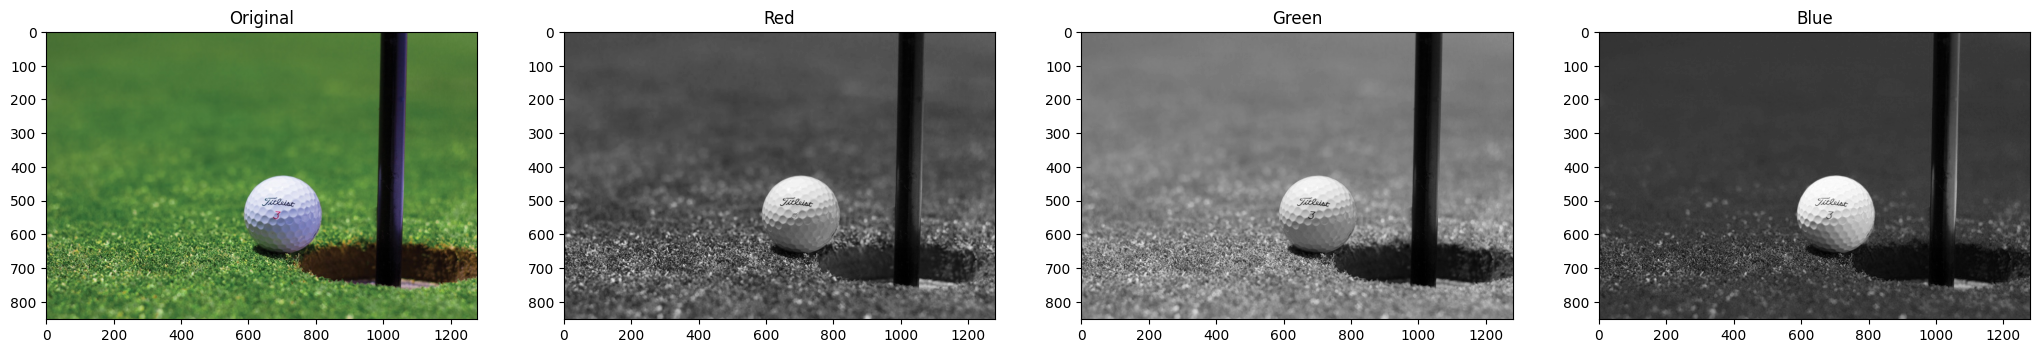

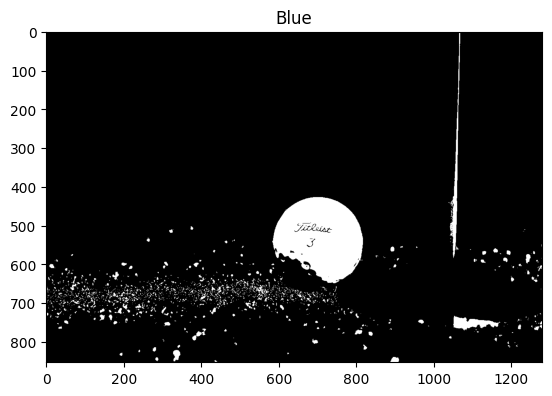

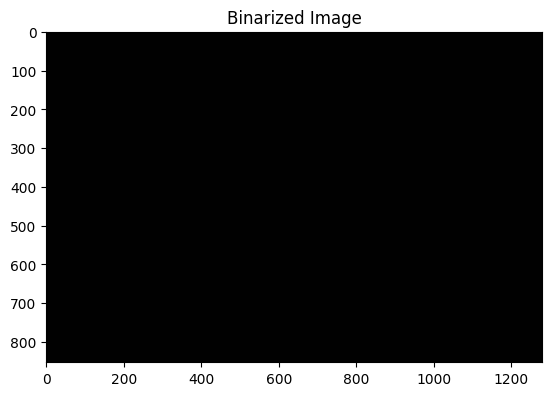

In [ ]:
## For all requirements: The quality of the results is evaluated.


# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)
# read image golf

golf = io.imread('imgs/exp1/golf.jpeg')
golf_f = skimage.img_as_float(golf)

# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)

red, green, blue = golf_f[:,:,0], golf_f[:,:,1], golf_f[:,:,2]

# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)

show_images([golf_f, red, green, blue], ['Original', 'Red', 'Green', 'Blue'])

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)

threshold = 100 / 255

mask = blue > threshold

blue_copy = blue.copy()

blue_copy[mask] = 1
blue_copy[~mask] = 0

show_images([blue_copy], ['Blue'])

# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold

gt_red = blue > red
gt_green = blue > green

mask = np.logical_and(gt_red, gt_green)

blue[mask] = 1
red[mask] = 1
green[mask] = 1

blue[~mask] = 0
red[~mask] = 0
green[~mask] = 0



# 6- display the binarized image

golf = np.dstack((red, green, blue))

show_images([golf], ['Binarized Image'])








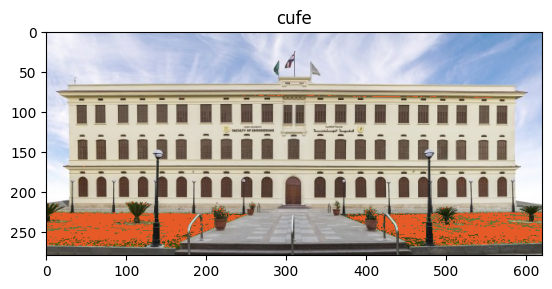

In [71]:
# 1- Get the required RGB color (Using a color picker)

required_color = np.array([76,97,39]) / 255

# 2- Read image

cufe = io.imread('imgs/exp2/cufe.png')
cufe_f = cufe.astype(float)
cufe_f = cufe_f / 255

# 3- extract R, G and B channels (as float)

r, g, b = cufe_f[:,:,0], cufe_f[:,:,1], cufe_f[:,:,2]


# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)

diff_r = r - required_color[0]
diff_g = g - required_color[1]
diff_b = b - required_color[2]

# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)

dist = np.sqrt(diff_r**2 + diff_g**2 + diff_b**2)

# 6-  create a mask by thresholding the difference

mask = dist < 0.1

# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40

cufe[mask] = [230, 90, 40]

# 8- show the image or save itr

show_images([cufe], ['cufe'])
